## **Step 0: Import Libraries**

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Supressing Unnecessary Warnings
import warnings


: 

In [ ]:
# Settings
warnings.simplefilter('ignore')
# Show all columns
pd.set_option('display.max_columns', None)

## **Step 1: Load Data**

In [ ]:
# Load the datasets
client_data = pd.read_csv(r"D:\LHL\repo2\PowerCo-Custumer-Churn\PowerCo-Custumer-Churn\Data\client_data.csv")
price_data = pd.read_csv(r"D:\LHL\repo2\PowerCo-Custumer-Churn\PowerCo-Custumer-Churn\Data\price_data.csv")

In [3]:
display(client_data.head())
print("================")
display(price_data.head())

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## **Step 2: Aggregate Price Data (Customer-Level Summary)**

### **Investigate data before merging**

In [4]:
# Get the info of the datasets
display(client_data.info())
print("================")
display(price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


None

- We have a mix of categorical and numerical data in the client_data but price_data seems to have only numerical.

In [5]:
# Check for missing values in price_data
missing_price = price_data.isnull().sum()
print("Missing values in price_data:")
print(missing_price[missing_price > 0])
print("================")
missing_client = client_data.isnull().sum()
print("Missing values in client_data:")
print(missing_client[missing_client > 0])
print("================")
# Check for duplicates in price_data
duplicates_price = price_data.duplicated().sum()
print(f"Number of duplicate rows in price_data: {duplicates_price}")
print("================")
# Check for duplicates in client_data
duplicates_client = client_data.duplicated().sum()
print(f"Number of duplicate rows in client_data: {duplicates_client}")
print("================")

Missing values in price_data:
Series([], dtype: int64)
Missing values in client_data:
Series([], dtype: int64)
Number of duplicate rows in price_data: 0
Number of duplicate rows in client_data: 0


### **Merge both data sets**
- Before attempting to merge we need to aggregate the price data into customer level by taking mean values.

In [6]:
# Compute average prices per customer:
price_agg = price_data.groupby('id').agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

price_agg.columns = ['id', 'avg_var_offpeak', 'avg_var_peak', 'avg_var_midpeak',
                     'avg_fix_offpeak', 'avg_fix_peak', 'avg_fix_midpeak']


- Sanity check for unatended duplicated rows in the id column.

In [7]:
# Check for duplicates in the 'id' column oin the aggregated price data
price_agg["id"].duplicated().sum()

0

- Merge has to be a left one we ned to keep all client_data as the objective of this project is to investigate clien churn.

In [8]:
# Left merge the aggregated price data with client data
df = client_data.merge(price_agg, on='id', how='left')
# Check for duplicates in the merged data
duplicates_merged = df.duplicated().sum()
print(f"Number of duplicate rows in merged data: {duplicates_merged}")
print("================")
# Check for missing values in the merged data
missing_merged = df.isnull().sum()
print("Missing values in merged data:")
print(missing_merged[missing_merged > 0])
print("================")
# Check for duplicates in the 'id' column of the merged data
print(df["id"].duplicated().sum())
print("================")


Number of duplicate rows in merged data: 0
Missing values in merged data:
Series([], dtype: int64)
0


### **Change the dates into datetime object**
- We need to keep the dates in datetime object.

In [11]:
# Change the date time columns into datetime
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    print(f"Converted {col} to datetime format.")

# Check for missing values in the date columns
missing_dates = df[date_cols].isnull().sum()
print("Missing values in date columns:")
print(missing_dates[missing_dates > 0])
print("================")


Converted date_activ to datetime format.
Converted date_end to datetime format.
Converted date_modif_prod to datetime format.
Converted date_renewal to datetime format.
Missing values in date columns:
Series([], dtype: int64)


### **Check for categorical Values**
- We might have discrete values which we might have to map before reaching the modeling stage.

In [12]:
# List nominalcolumns
for col in df.columns:
    nominal = df[col].unique()
    print(col, nominal if len(nominal) < 15 else "Too many unique values",f": {len(nominal)}")
print("================")


id Too many unique values : 14606
channel_sales ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa'] : 8
cons_12m Too many unique values : 11065
cons_gas_12m Too many unique values : 2112
cons_last_month Too many unique values : 4751
date_activ Too many unique values : 1796
date_end Too many unique values : 368
date_modif_prod Too many unique values : 2129
date_renewal Too many unique values : 386
forecast_cons_12m Too many unique values : 13993
forecast_cons_year Too many unique values : 4218
forecast_discount_energy [ 0. 30. 24. 28. 26. 22. 10.  5. 25. 19. 17. 23.] : 12
forecast_meter_rent_12m Too many unique values : 3528
forecast_price_energy_off_peak Too many unique values : 516
forecast_price_energy_peak Too many unique values : 329
forecast_price_pow_off_peak Too many unique 

In [13]:
# Map "has_gas" column values t,f with 1 and 0
df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})

### **Descriptive statistics of data**


In [14]:
display(df.describe())


,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,avg_var_offpeak,avg_var_peak,avg_var_midpeak,avg_fix_offpeak,avg_fix_peak,avg_fix_midpeak
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,0.181501,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152,0.142327,0.052063,0.028276,42.928890,9.460874,6.097680
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000,0.124430,0.000000,0.000000,40.688156,0.000000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,0.000000,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000,0.147630,0.084509,0.000000,44.281745,0.000000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,0.000000,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000,0.150415,0.102479,0.072833,44.370635,24.372163,16.248109
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000,0.278098,0.196275,0.102951,59.286190,36.490689,16.818917
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,0.385446,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175,0.022512,0.049879,0.035802,4.550759,12.053587,7.770748


- We have highly skewed data as shown in the percentile values.

## **Step 3: Data Vizualization**

In [15]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### **Distibution of Target Variable**

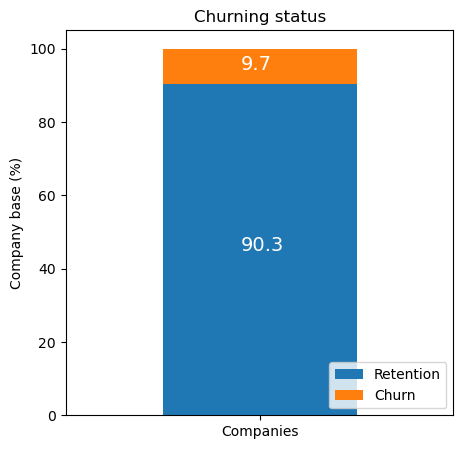

In [16]:
churn = df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

- Customer churn is about 10%.

### **Sales Channel**

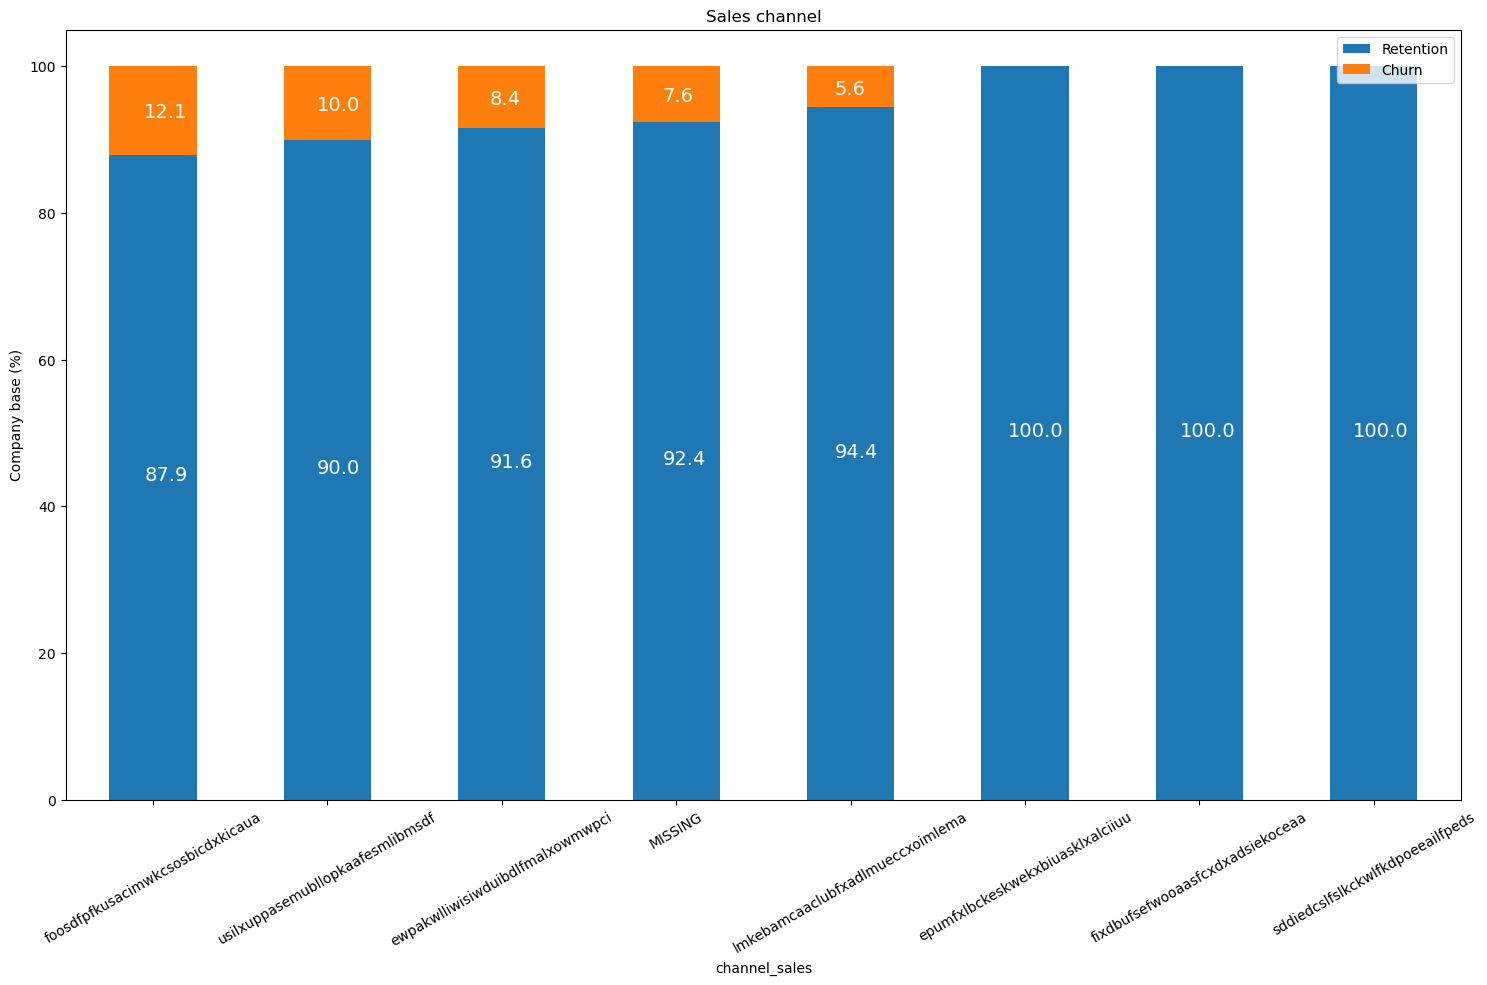

In [17]:
channel = df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

🛒 **Churn Across Sales Channels**
- **Channel Impact:** Churned customers are disributed in 5 different `Channel_sales` hinting at inconsistent engagement strategies.
- **Data Gaps:** The `MISSING` category may hide important churn patterns.

### **Consumption**

In [18]:
consumption = df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [19]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

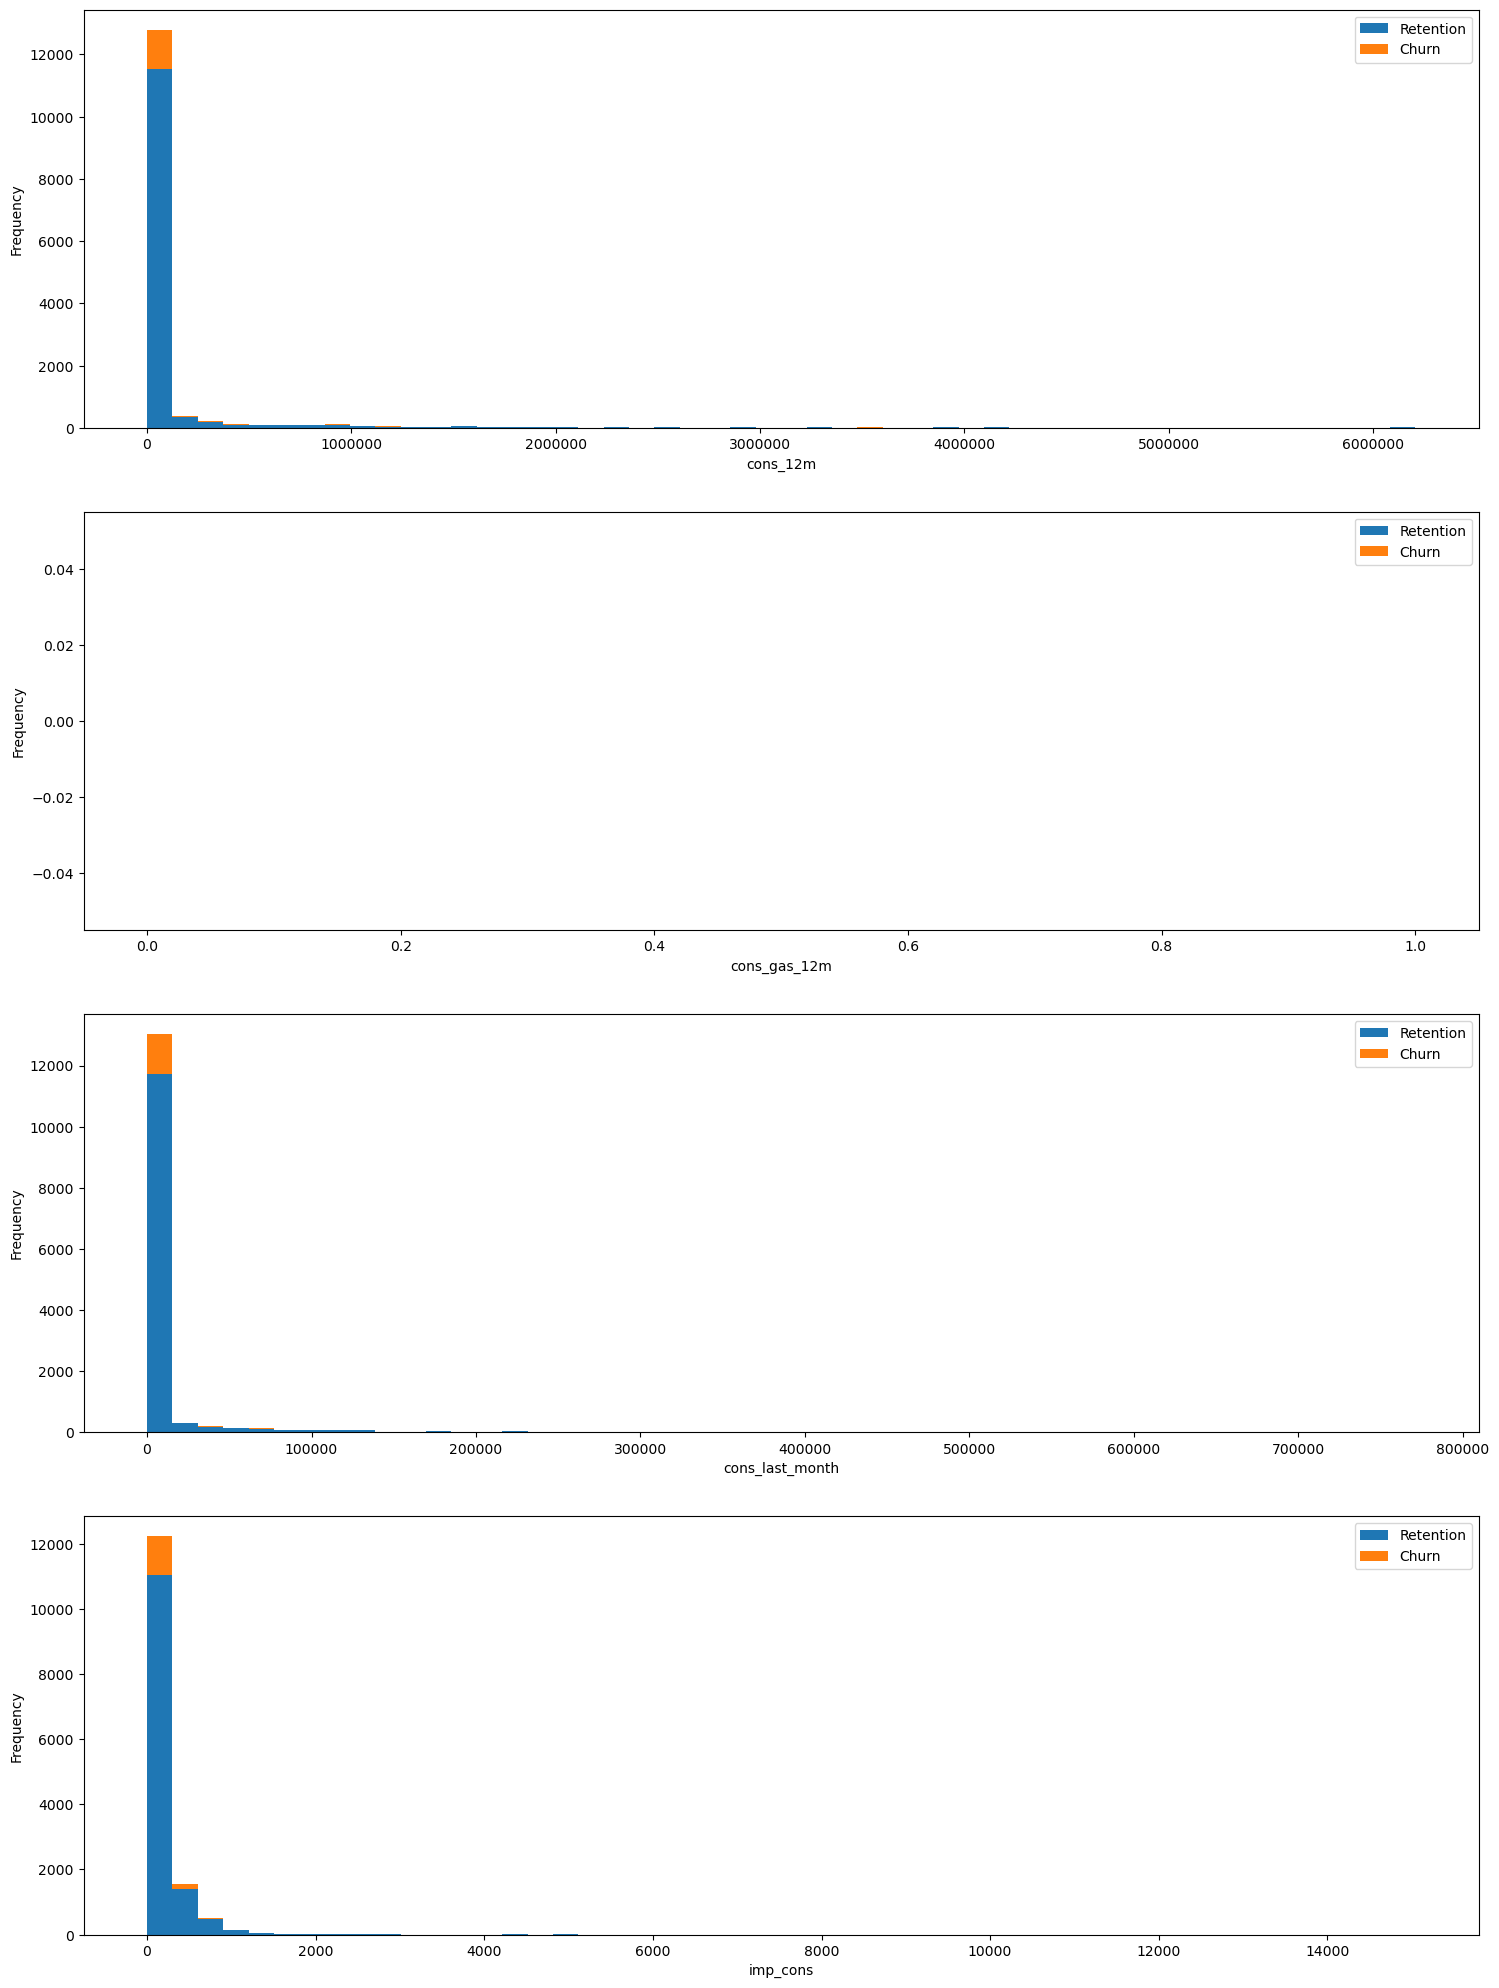

In [20]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

The consumption data is **heavily right-skewed**—most customers use relatively no to little, but a few have extremely high usage, creating a long tail of outliers. To better understand these extremes, we’ll use a **boxplot**, which visualizes the distribution using five key statistics:

- **Minimum**
- **First Quartile (Q1)**
- **Median**
- **Third Quartile (Q3)**
- **Maximum**

Boxplots make it easy to spot outliers, see how spread out the data is, and reveal whether the distribution is symmetrical or skewed. This helps to quickly identify unusual consumption patterns and understand the overall shape of our data.

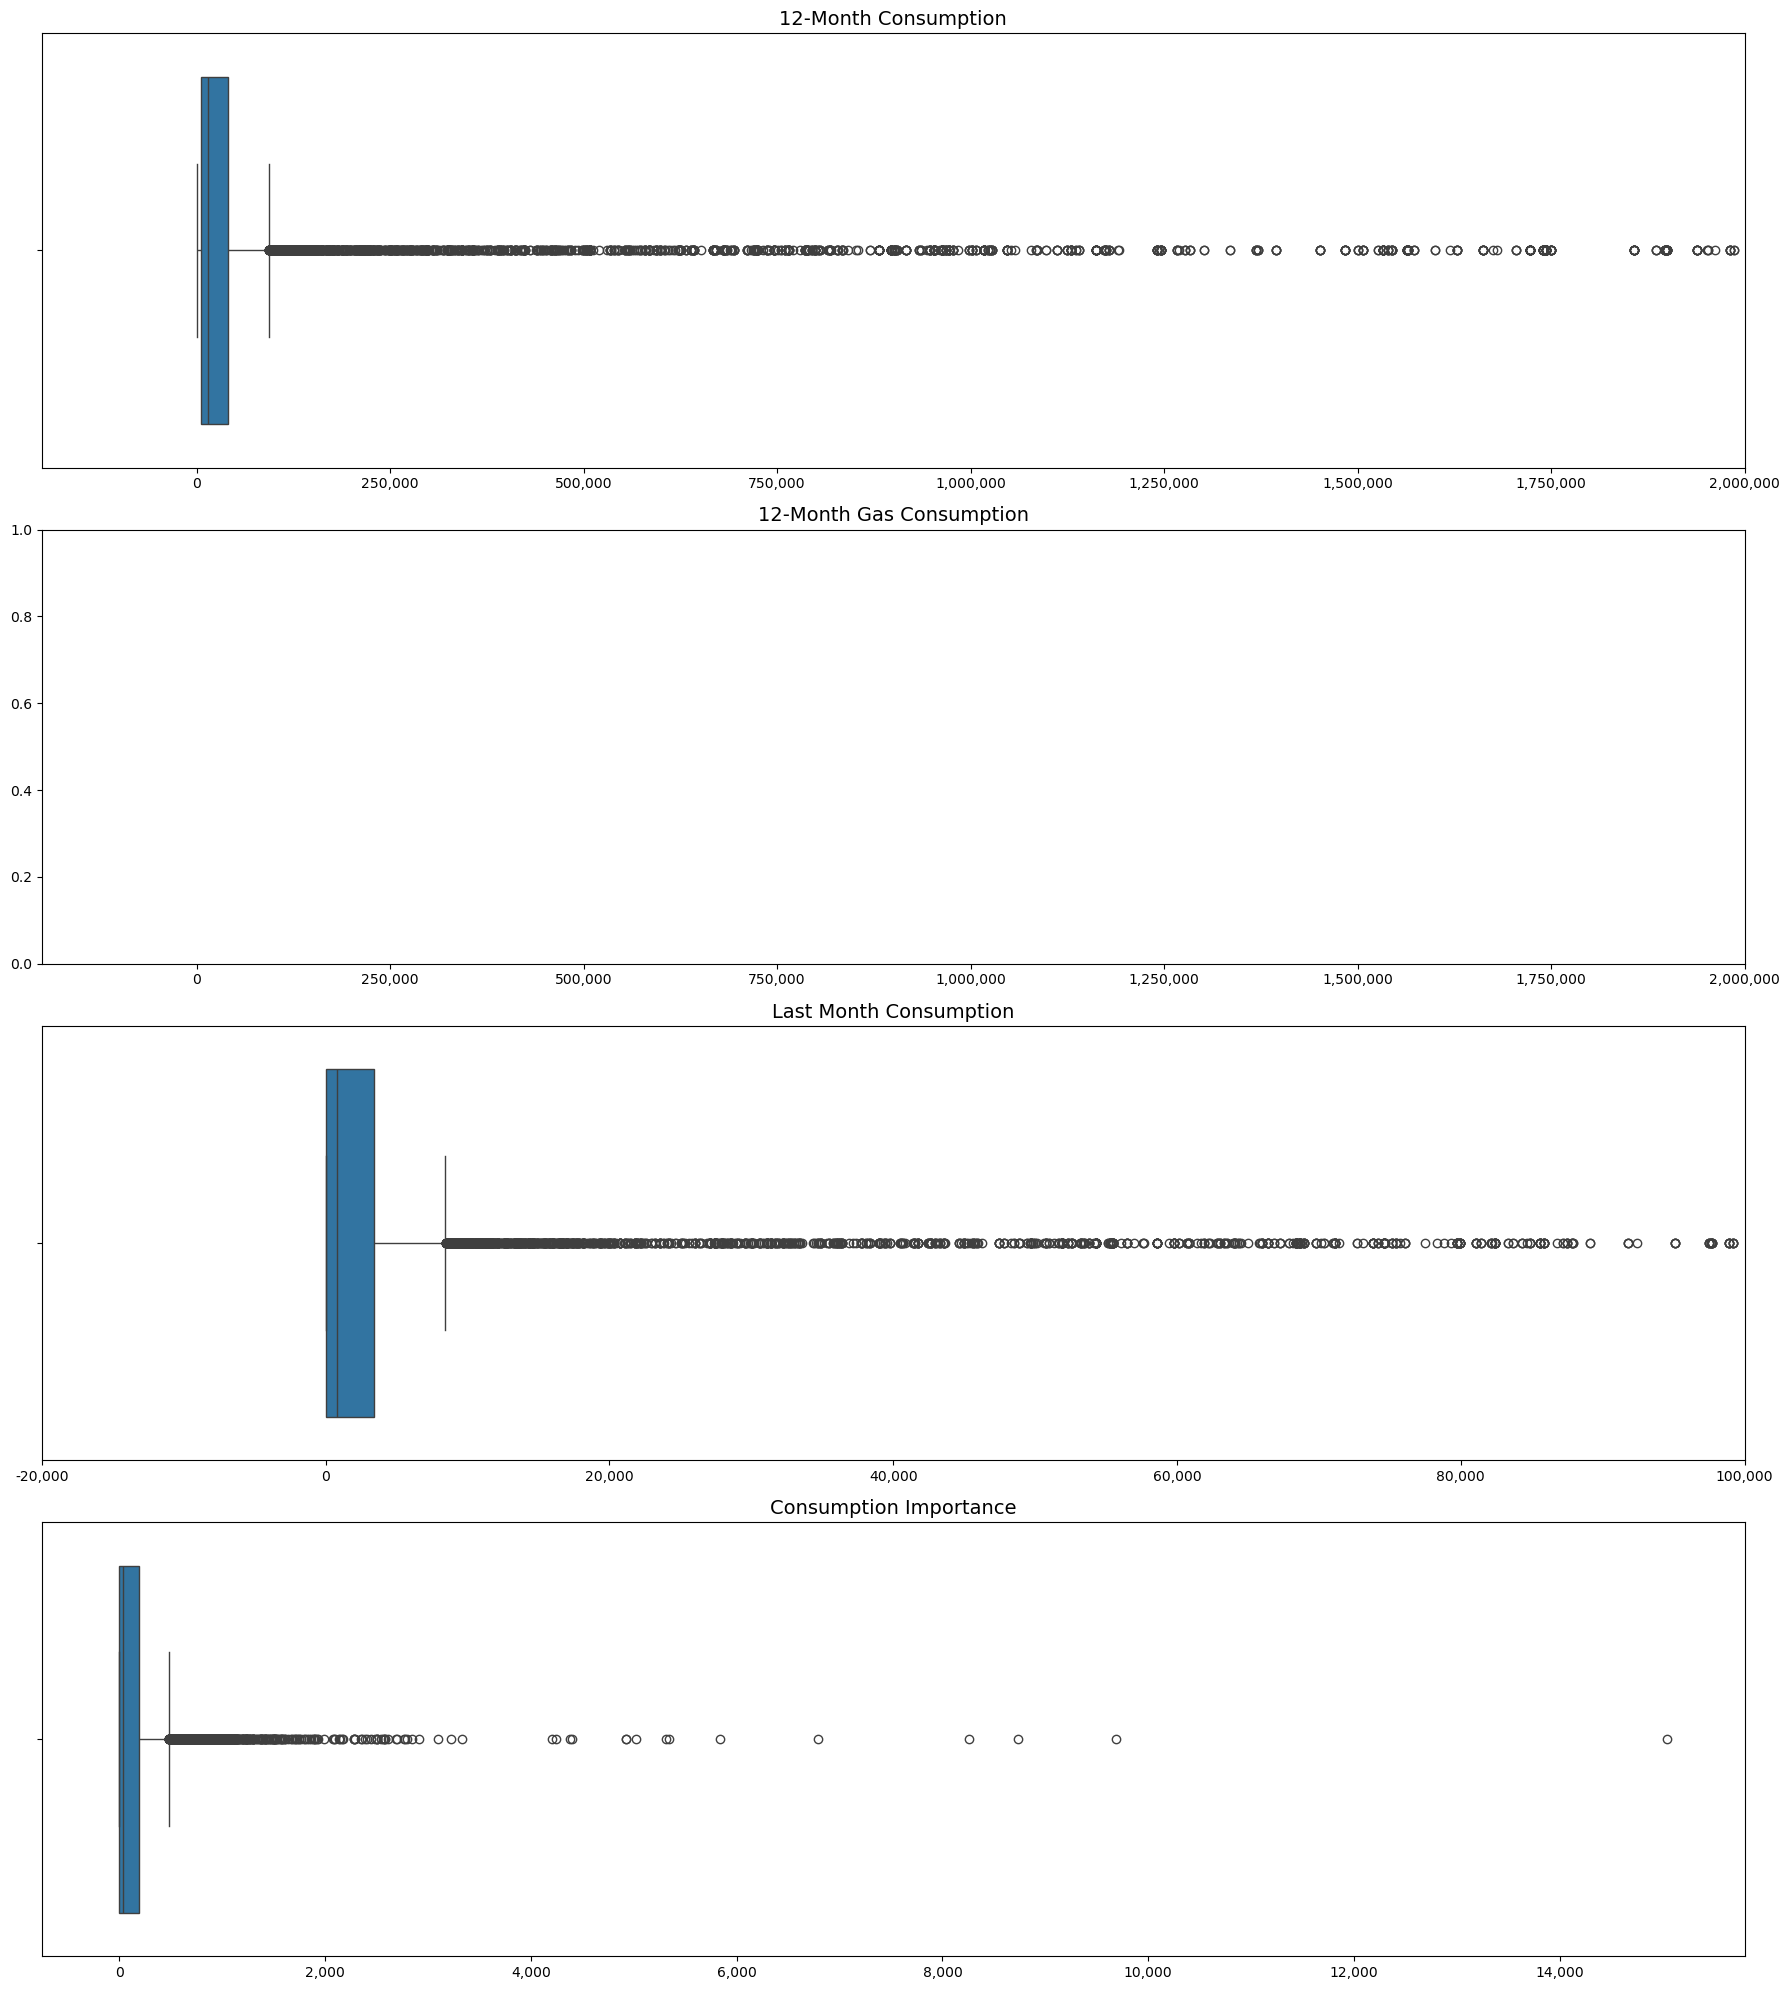

In [21]:
def plot_consumption_boxplots(data, figsize=(18, 20)):
    """
    Creates boxplots for consumption metrics with proper formatting.
    
    Parameters:
    -----------
    data : pandas DataFrame
        DataFrame containing consumption data
    figsize : tuple, default=(18, 20)
        Figure size (width, height) in inches
        
    Returns:
    --------
    matplotlib.figure.Figure
        The figure containing the plots
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.ticker as ticker
    
    # Create figure and subplots
    fig, axs = plt.subplots(nrows=4, figsize=figsize)
    
    # Define titles and limits
    plot_configs = [
        {"data": data["cons_12m"], "title": "12-Month Consumption", "xlim": (-200000, 2000000)},
        {"data": data[data["has_gas"] == "t"]["cons_gas_12m"], "title": "12-Month Gas Consumption", "xlim": (-200000, 2000000)},
        {"data": data["cons_last_month"], "title": "Last Month Consumption", "xlim": (-20000, 100000)},
        {"data": data["imp_cons"], "title": "Consumption Importance", "xlim": None}
    ]
    
    # Plot each boxplot
    for i, config in enumerate(plot_configs):
        # Create boxplot
        sns.boxplot(x=config["data"], ax=axs[i])
        
        # Set title
        axs[i].set_title(config["title"], fontsize=14)
        
        # Format x-axis to use comma as thousands separator
        axs[i].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        
        # Set x-axis limits if specified
        if config["xlim"]:
            axs[i].set_xlim(config["xlim"])
        
        # Improve readability
        axs[i].set_xlabel("")
    
    # Adjust layout
    plt.tight_layout()
    
    return fig


# Example usage:
fig = plot_consumption_boxplots(consumption)
plt.show()


### **Contract type**

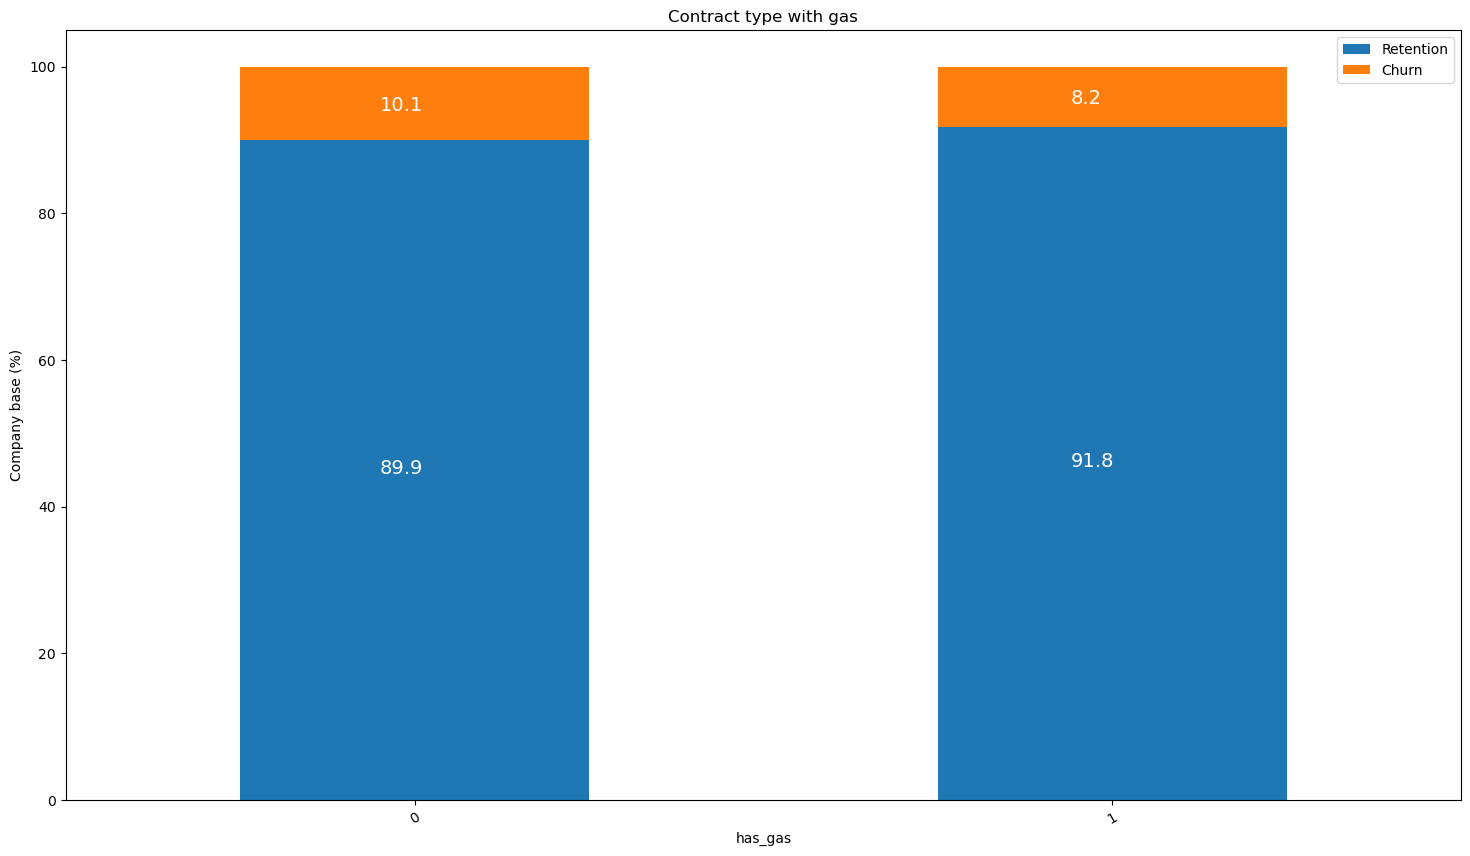

In [22]:
contract_type = df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(contract_percentage, 'Contract type with gas', rot_=30)

- Customers with out gas contract tend to churn a bit more compared to customers with gas.

### **Margins**

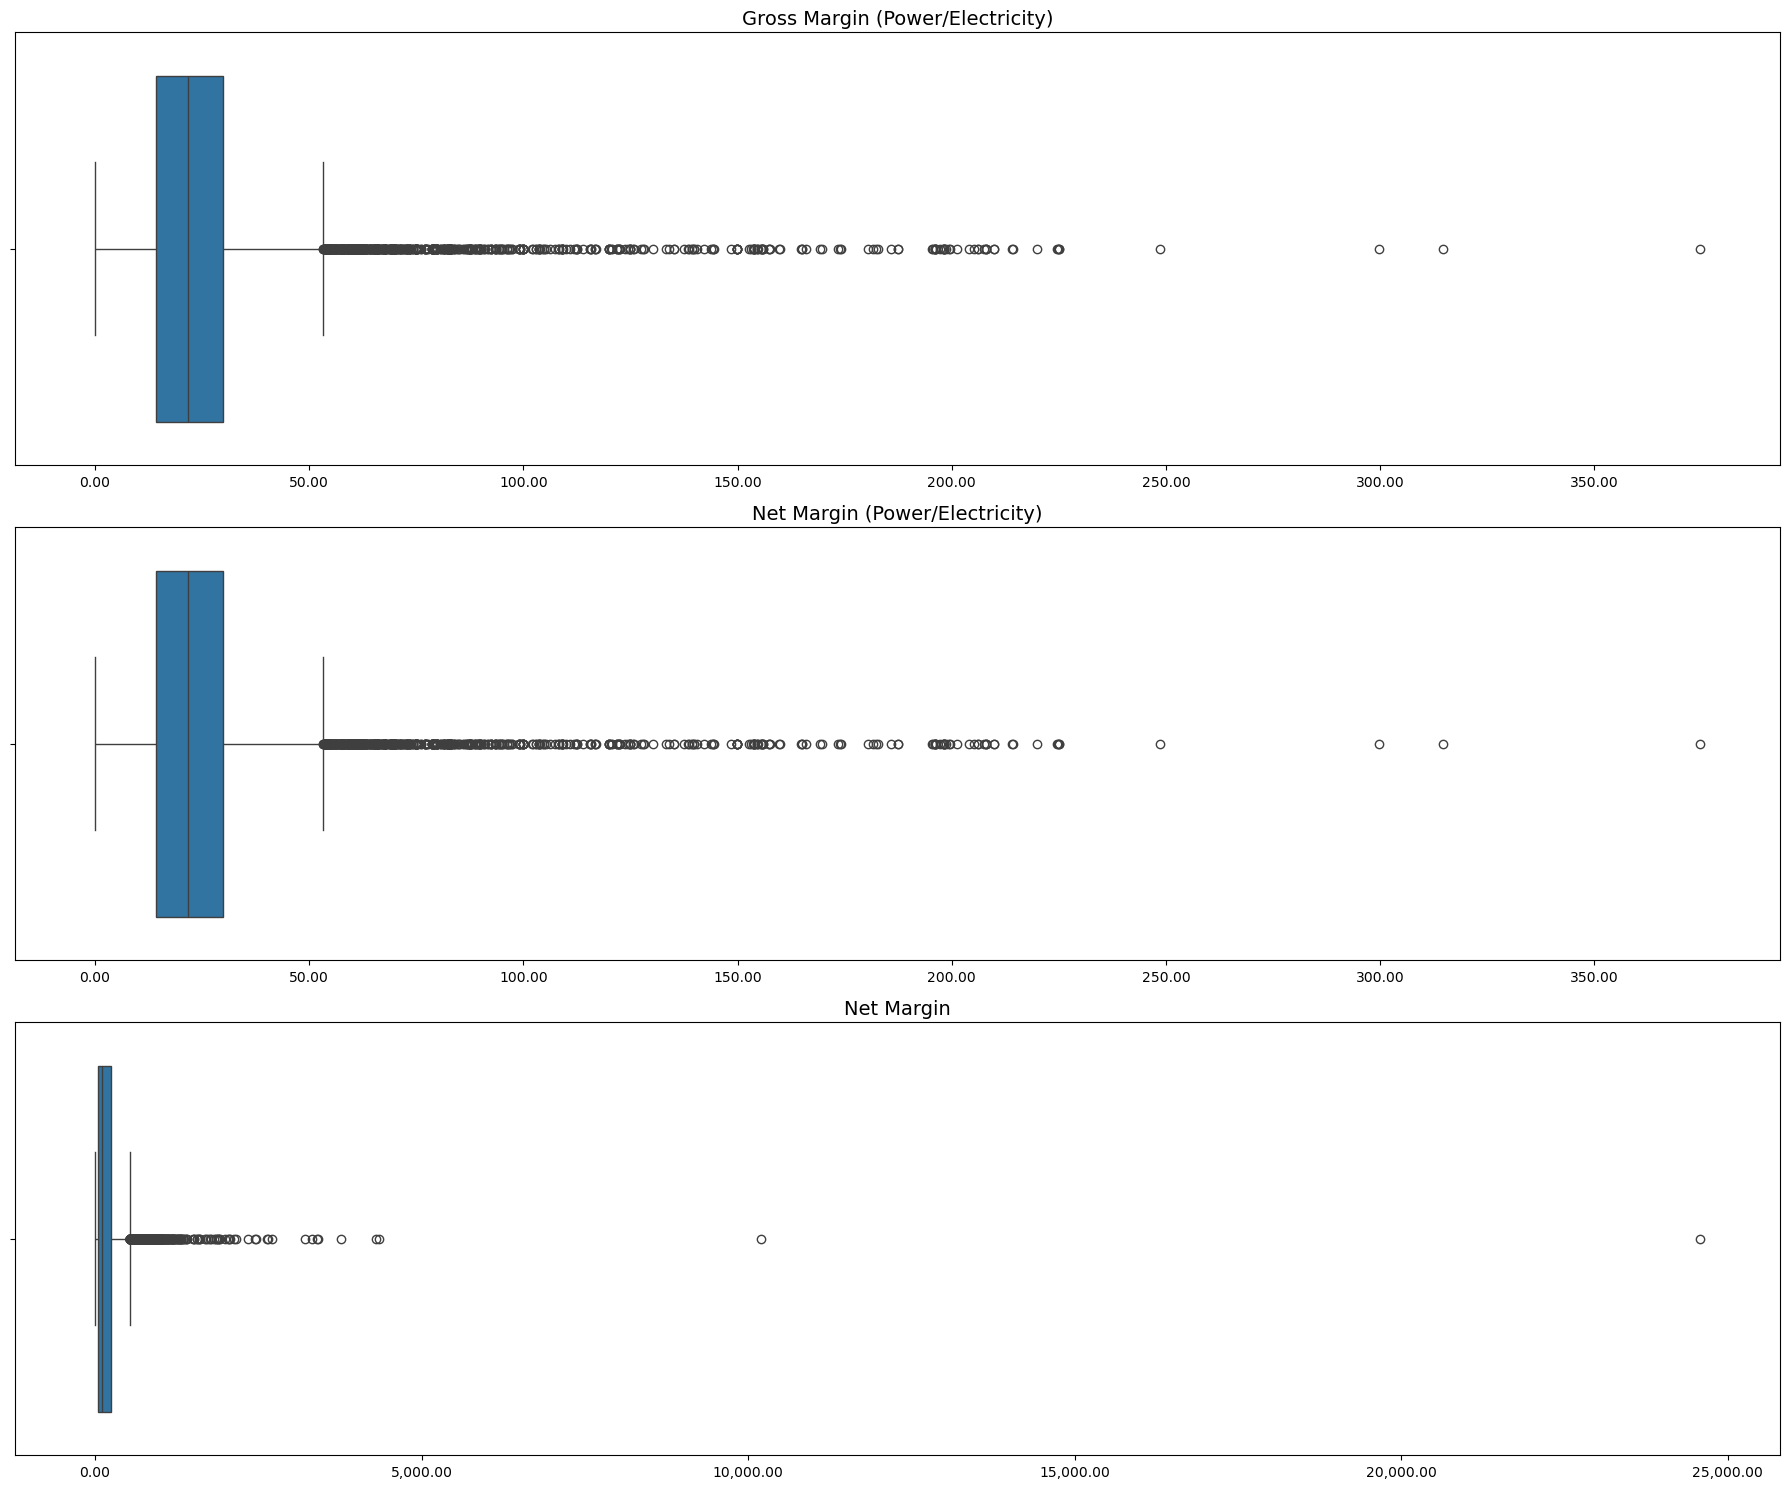

In [23]:
def plot_margin_boxplots(data, figsize=(18, 15)):
    """
    Creates boxplots for margin metrics with proper number formatting.
    
    Parameters:
    -----------
    data : pandas DataFrame
        DataFrame containing margin data columns
    figsize : tuple, default=(18, 15)
        Figure size (width, height) in inches
        
    Returns:
    --------
    matplotlib.figure.Figure
        The figure containing the plots
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.ticker as ticker
    
    # Create figure and subplots
    fig, axs = plt.subplots(nrows=3, figsize=figsize)
    
    # Define the metrics and their display titles
    margin_metrics = [
        {"column": "margin_gross_pow_ele", "title": "Gross Margin (Power/Electricity)"},
        {"column": "margin_net_pow_ele", "title": "Net Margin (Power/Electricity)"},
        {"column": "net_margin", "title": "Net Margin"}
    ]
    
    # Plot each boxplot
    for i, metric in enumerate(margin_metrics):
        # Create the boxplot
        sns.boxplot(x=data[metric["column"]], ax=axs[i])
        
        # Set title
        axs[i].set_title(metric["title"], fontsize=14)
        
        # Format x-axis to use comma as thousands separator
        axs[i].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
        
        # Improve readability
        axs[i].set_xlabel("")
        
        # Add a vertical line at x=0 if values span positive and negative
        if (data[metric["column"]].min() < 0) and (data[metric["column"]].max() > 0):
            axs[i].axvline(x=0, color='gray', linestyle='--', alpha=0.7)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig


# Example usage:
margin = df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
fig = plot_margin_boxplots(margin)
plt.show()



- There are some outliers here too, will need transformations.

### **Customer Churn versus key timelines**

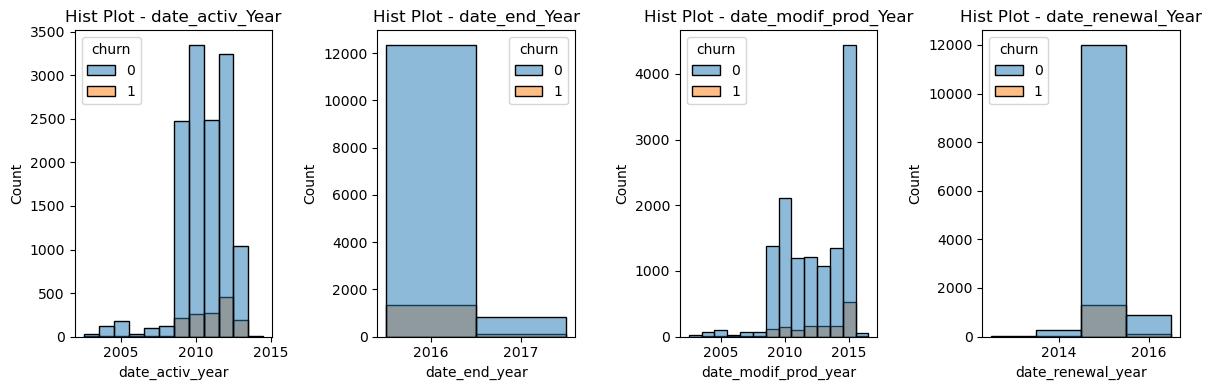

In [24]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

# Convert date columns to datetime format if not already
for col in cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Handle invalid dates
    df[f"{col}_year"] = df[col].dt.year  # Extract year

# Generate histograms using year values
for i, col in enumerate(cols):
    sns.histplot(df, x=f"{col}_year", ax=ax[i], hue='churn', discrete=True)
    ax[i].set_title(f'Hist Plot - {col}_Year')

plt.tight_layout()
plt.show()


In [25]:
# Count occurrences of each year for activation, end, modification, and renewal
year_counts = {}
cols = ["date_activ_year", "date_end_year", "date_modif_prod_year", "date_renewal_year"]

for col in cols:
    year_counts[col] = df[col].value_counts().sort_index()  # Sort to maintain order

# Display results
for col, counts in year_counts.items():
    print(f"\nYearly Counts for {col}:")
    print(counts)



Yearly Counts for date_activ_year:
date_activ_year
2003      39
2004     137
2005     189
2006      36
2007      95
2008     124
2009    2690
2010    3609
2011    2758
2012    3704
2013    1224
2014       1
Name: count, dtype: int64

Yearly Counts for date_end_year:
date_end_year
2016    13663
2017      943
Name: count, dtype: int64

Yearly Counts for date_modif_prod_year:
date_modif_prod_year
2003      22
2004      70
2005     104
2006      26
2007      78
2008      78
2009    1499
2010    2248
2011    1296
2012    1385
2013    1243
2014    1516
2015    4974
2016      67
Name: count, dtype: int64

Yearly Counts for date_renewal_year:
date_renewal_year
2013       25
2014      278
2015    13297
2016     1006
Name: count, dtype: int64


📊 **Customer Lifecycle Timeline: Key Events & Trends**

---

🚀 **Customer Acquisition (`date_activ`)**
- **Peak Growth:** Most activations occurred between **2009 and 2012**.
- **Record Years:** Both **2010** and **2012** saw 3,600 + new customers each.
- **Market Shift:** A sharp decline in 2013, with **almost no new activations after 2014**—hinting at a major strategic or market change.

---

⏳ **Contract Expiration (`date_end`)**
- **Mass Expiry:** An overwhelming **13,663 contracts ended in 2016**.
- **Aftershock:** Only **943 expirations in 2017**.
- **Insight:** This points to a highly synchronized contract cycle, with most customers reaching term limits together in 2016.

---

🔄 **Product Modifications (`date_modif_prod`)**
- **Biggest Wave:** **2015** stands out with **4,974 modifications**.
- **Other Hotspots:** Notable activity between **2009 and 2014**.
- **Interpretation:** The 2015 spike may reflect strategic product changes—possibly to boost retention or prep for renewals.

---

🔁 **Contract Renewals (`date_renewal`)**
- **Renewal Frenzy:** **2015** dominates with **13,297 renewals**.
- **Drop-off:** Only **1,006 renewals in 2016**; a handful in 2014 (278) and 2013 (25).
- **Takeaway:** The clustering in 2015 suggests most customers were on similar contract timelines, likely impacting churn patterns.

---

> 💡 **Summary:**  
> The customer journey is marked by synchronized contract cycles, concentrated product changes, and a dramatic shift in acquisition strategy post-2012. These patterns are crucial for understanding churn and planning retention strategies.

## **Export the cleaned dataset**

In [26]:
# Export the cleaned and merged DataFrame to a CSV file
df.to_csv(r"D:\LHL\repo2\PowerCo-Custumer-Churn\PowerCo-Custumer-Churn\Data\cleaned_data.csv", index=False)
print("Cleaned data exported successfully to 'cleaned_data.csv'.")

# Display the shape of the final DataFrame
print(f"Final DataFrame shape: {df.shape}")

Cleaned data exported successfully to 'cleaned_data.csv'.
Final DataFrame shape: (14606, 36)
